https://stackoverflow.com/questions/63528705/how-to-modify-edge-labels-in-digraph-of-networkx

In [1]:
import networkx as nx
from networkx.drawing.nx_agraph import write_dot, graphviz_layout
from matplotlib import pyplot as plt
import numpy as np

In [2]:
edges = {'0in1out': ['0in', '1out', -3.6377842209674958],
'1mid0mid': ['1mid', '0mid', 0.6165115214405615],
'1in1mid': ['1in', '1mid', 3.6368075690523423],
'0in1mid': ['0in', '1mid', -2.76795360903403],
'0mid0out': ['0mid', '0out', -0.7665496719059972],
'0mid1out': ['0mid', '1out', 2.0047001373416755],
'0mid1mid': ['0mid', '1mid', -1.34533801312376],
'1in0mid': ['1in', '0mid', 2.136059819929803],
'0mid0mid': ['0mid', '0mid', -1.8265832443155807],
'1mid0out': ['1mid', '0out', 2.9330077826949488],
'0in0out': ['0in', '0out', 2.913596825881276],
'1in2out': ['1in', '2out', 3.5933465588280176]}

edges = [tuple(edges[i]) for i in edges]

In [3]:
my_graph = nx.MultiDiGraph()
my_graph.add_weighted_edges_from(edges)

In [4]:
for i in my_graph.adjacency():
    print(i)

('0in', {'1out': {0: {'weight': -3.6377842209674958}}, '1mid': {0: {'weight': -2.76795360903403}}, '0out': {0: {'weight': 2.913596825881276}}})
('1out', {})
('1mid', {'0mid': {0: {'weight': 0.6165115214405615}}, '0out': {0: {'weight': 2.9330077826949488}}})
('0mid', {'0out': {0: {'weight': -0.7665496719059972}}, '1out': {0: {'weight': 2.0047001373416755}}, '1mid': {0: {'weight': -1.34533801312376}}, '0mid': {0: {'weight': -1.8265832443155807}}})
('1in', {'1mid': {0: {'weight': 3.6368075690523423}}, '0mid': {0: {'weight': 2.136059819929803}}, '2out': {0: {'weight': 3.5933465588280176}}})
('0out', {})
('2out', {})


In [5]:
dic_in_out = {'in':[], 'out':[]}
for i,j,_ in edges:
    if 'in' in i and 'out' in j:
        dic_in_out['in'].append(i)
        dic_in_out['out'].append(j)
    if 'in' in i:
        dic_in_out['in'].append(i)
    elif 'out' in j:
        dic_in_out['out'].append(j)
        
dic_in_out['in'] = list(set(dic_in_out['in']))
dic_in_out['out'] = list(set(dic_in_out['out']))

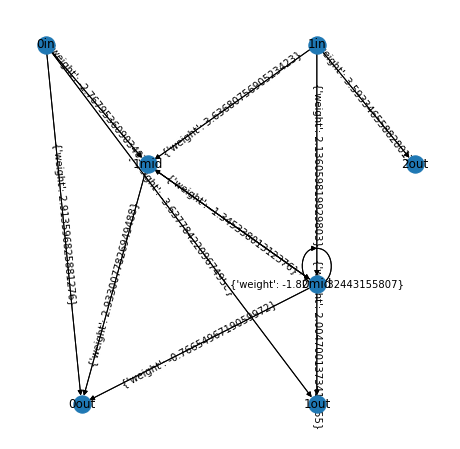

<Figure size 432x288 with 0 Axes>

In [6]:
plt.figure(figsize=[8,8])
pos = graphviz_layout(my_graph, prog='dot')
labels = nx.get_edge_attributes(my_graph, 'w')

nx.draw_networkx_edge_labels(my_graph, pos)
nx.draw(my_graph, pos, with_labels=True, arrows=True)
nx.draw_networkx_edges(my_graph, pos)

plt.show()
plt.clf()

automate patchs

In [7]:
dic_out = {i:{} for i in dic_in_out['out']}
for out_n in dic_in_out['out']:
    for in_n in dic_in_out['in']:
        # in-mid-out loop
        for path in nx.all_simple_edge_paths(my_graph, source=in_n, target=out_n):
            if len(path) > 1:
                if dic_out[out_n] and len(path) == len(dic_out[out_n][0]):
                    dic_out[out_n].append(path)
                elif not dic_out[out_n]:
                    dic_out[out_n] = [path]
                elif dic_out[out_n] and len(path) > len(dic_out[out_n][0]):
                    dic_out[out_n] = [path]
        # in-out loop       
        for path in nx.all_simple_edge_paths(my_graph, source=in_n, target=out_n):
            if len(path) == 1:
                if dic_out[out_n]:
                    dic_out[out_n].append(path)
                elif not dic_out[out_n]:
                    dic_out[out_n] = [path]

add tanh(sum(inputs))

https://networkx.org/documentation/stable/reference/classes/generated/networkx.MultiGraph.edge_subgraph.html?highlight=multigraph  https://networkx.org/documentation/stable/reference/classes/generated/networkx.MultiDiGraph.predecessors.html#networkx.MultiDiGraph.predecessors

In [6]:
for i in my_graph.predecessors('0mid'):
    print(i)

1mid
1in
0mid
